**Exploratory Data Analysis**

Using Python and applying Logistic Regression

Using titanic data set from kaggle which is a famous data set often used as a first step for machine learning.

Problem statement is to predict the status of a passenger(survived or deceased) based on the given data. 

We use a semi-cleaned version of the titanic data set that is available on kaggle.

**Import libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read titanic.csv file into pandas dataframe**

In [3]:
train=pd.read_csv("titanic_train.csv")
#df is train

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Pre Processing**

Look for missing values (NaN)

Use seaborn to create a simple heatmap to detect areas where data is missing

In [5]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
train.isnull().sum()
#To know the exact number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

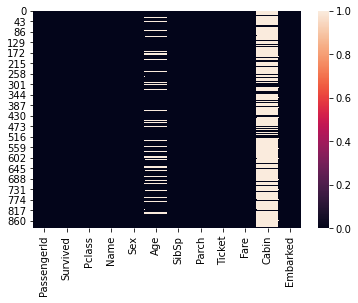

In [8]:
sns.heatmap(train.isnull())

<AxesSubplot:>

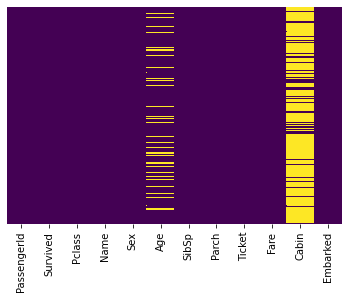

In [9]:
#using other parameters in heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

**Observations:**

NaN values are present in age and cabin columns, higher in cabin.

Around 20% or age values and 80% of cabin values are missing. As the proportion of age values missing is small enough there can be reasonable replacement with some form of imputation. Cabin values can be interpreted in a different form as cabin value known/unknown (1/0) in a different column.

<AxesSubplot:xlabel='Survived', ylabel='count'>

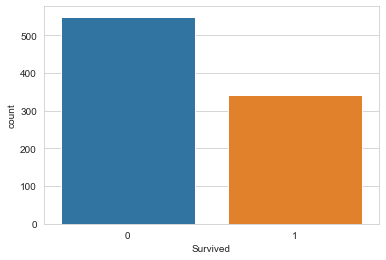

In [10]:
#continue visualisation of data
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

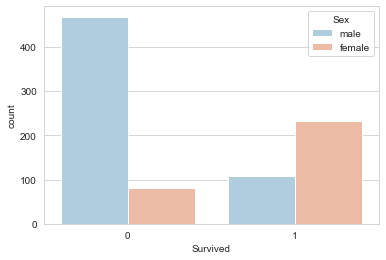

In [11]:
#getting more information
#gender wise distribution
sns.countplot(x="Survived",data=train,hue="Sex",palette="RdBu_r")

<AxesSubplot:xlabel='Survived', ylabel='count'>

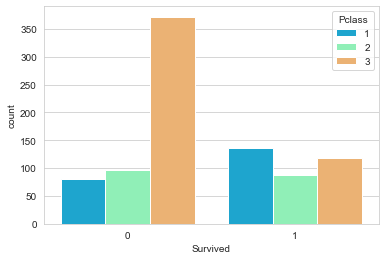

In [12]:
#passenger class wise distribution
sns.countplot(x="Survived",data=train,hue="Pclass",palette='rainbow')

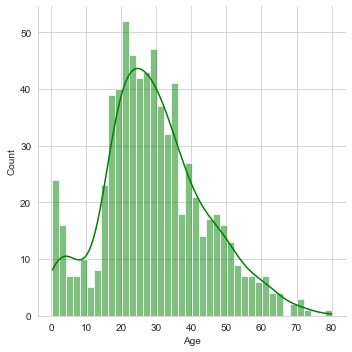

In [13]:
#distribution plot using age(while dropping the NaN values)
sns.displot(train['Age'].dropna(),kde=True,color='g',bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

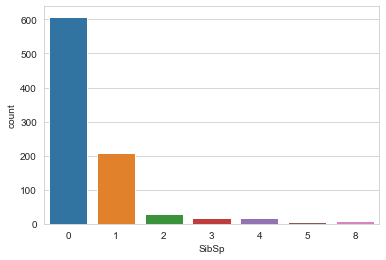

In [14]:
sns.countplot(x="SibSp",data=train)

<AxesSubplot:>

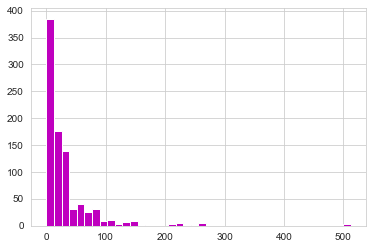

In [15]:
train['Fare'].hist(color='m',bins=40)

**Data Cleaning**

Replacing Null values 

Replacing Age with mean age(imputation) or mean age by passenger class.

In [16]:
#Find correlation between different features

In [17]:
#We find Age is correlated to Passenger ID and fare

In [18]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

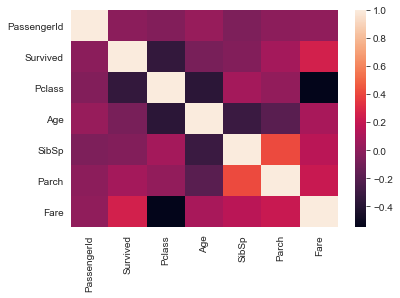

In [19]:
sns.heatmap(train.corr())
#As passenger id is a unique value it cant be used to predict passenger age. Similary fare.

In [20]:
#To check for average age by passenger class

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

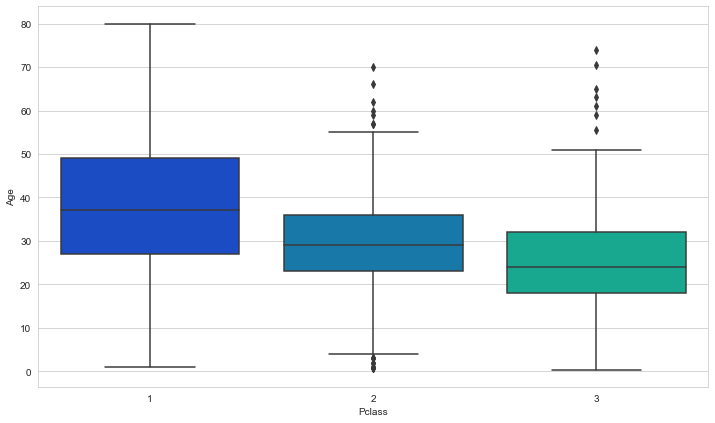

In [21]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train,palette='winter')

**Observations**

Roughly the average age of person in 1st class is 37, 2nd class is 29 and 3rd class is 24.

So write a function(def) to replace NaN values with these values

In [22]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
    
    else:
        return Age

Now Apply the impute_age(cols) function using the function called .apply

In [23]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

Now lets check that heatmap again

<AxesSubplot:>

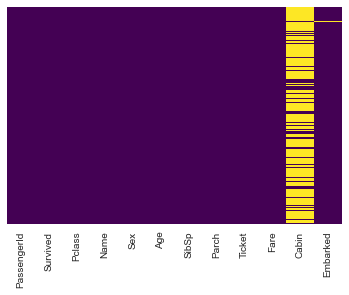

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Replacing cabin values the same way would require feature engineering, so for now we will drop the null values in cabin column

In [25]:
train.drop('Cabin',axis=1,inplace=True)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Converting Categorical Features**

Convert categorical features like sex(2 categories) and Embarked(3) into dummies using pandas(pd.get_dummies). Otherwise the Machinelearning algorithm will not be able to take them as inputs.

In [27]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
pd.get_dummies(train['Embarked'],drop_first=True).head()
#drop first drops first row and first column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [30]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [32]:
#to append the dummy sex and embark variables to the table use .concat

In [33]:
train=pd.concat([train,sex,embark],axis=1)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Now the data is ready for running the model**

**BUILDING A LOGISTICAL REGRESSION MODEL**

Split the data into training set and test set

Survive column is the dependent feature

In [35]:
train.drop('Survived',axis=1).head()
#input data set

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [36]:
train['Survived'].head()
#output data set

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test= train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

**Training and Predicting**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Shailu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()